# Unsupervised approach - Feature Sum Model

Paper: A. Elliott, M. Cucuringu, M. M. Luaces, P. Reidy, and G. Reinert, Anomaly detection in networks with application to financial transaction networks, 2019

Based on the open source: https://github.com/zhangcheng1006/Anomaly-Detection-in-Networks

In [1]:
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import logging
logging.basicConfig(format='%(asctime)s - %(levelname)s - %(message)s', level=logging.INFO)

import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from utils import *

%matplotlib inline

## Loading the generated data

The generated data are a combination of different generated transaction graph and their calculated features.

In [2]:
data_path = './data_small_graph/'

combined_directed_G = load_networkx_graphs(data_path)
X, Y, _ = retrieve_node_features_and_labels_tuple(combined_directed_G)

1000_Network_p_0.002_w_0.003.json  - max_node_id= -1
1000_Network_p_0.002_w_0.008.json  - max_node_id= 999
1000_Network_p_0.002_w_0.009.json  - max_node_id= 1999
1000_Network_p_0.004_w_0.004.json  - max_node_id= 2999
1000_Network_p_0.004_w_0.007.json  - max_node_id= 3999
1000_Network_p_0.004_w_0.009.json  - max_node_id= 4999
1000_Network_p_0.005_w_0.009.json  - max_node_id= 5999
1000_Network_p_0.006_w_0.007.json  - max_node_id= 6999
1000_Network_p_0.007_w_0.002.json  - max_node_id= 7999
1000_Network_p_0.007_w_0.009.json  - max_node_id= 8999
1000_Network_p_0.007_w_0.010.json  - max_node_id= 9999
1000_Network_p_0.008_w_0.000.json  - max_node_id= 10999
1000_Network_p_0.008_w_0.005.json  - max_node_id= 11999
1000_Network_p_0.008_w_0.007.json  - max_node_id= 12999
1000_Network_p_0.010_w_0.001.json  - max_node_id= 13999
1000_Network_p_0.010_w_0.006.json  - max_node_id= 14999
1000_Network_p_0.011_w_0.003.json  - max_node_id= 15999
1000_Network_p_0.011_w_0.005.json  - max_node_id= 16999
1000_N

## Feature Sum (Unsupervised)

__Discussion__:

Feature sum method relies on the ranking of the sum of features, so there is no need to do train-test-split.

__Feature sum without normalization__:

Prediction by feature sum, and then compute the precision, recall, F1-score for different sample sizes.

In [3]:
neg, pos = np.bincount(Y)
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 44000
    Positive: 6214 (14.12% of total)



In [4]:
# Sum of features
pred_fs = feature_sum(X, normalize=False)
sample_sizes = [8, 16, 32, 64, 128, 256, 512, 1014, 2000, 4000, 6000, 8000, 10000, 11250, 15000]
precs, recs, f1 = precision_recall(pred_fs, Y, *sample_sizes)

In [17]:
# Order of feature sum of all nodes
result_df = pd.DataFrame({'Y': Y, 'pred_fs': pred_fs})
result_df = result_df.sort_values(by=['pred_fs'], ascending=False)
print("Descending order of feature sum values")
result_df

Descending order of feature sum values


,Y,pred_fs
37347,1,1934.377740
37212,1,1931.017064
37839,1,1930.992847
37017,1,1930.218876
37416,1,1930.182462
...,...,...
25962,0,15.667713
25891,0,15.664104
40050,0,15.370605
25604,0,15.143244


In [20]:
print("Prediction performance of anamolous nodes based on the feature sum.\n")
print("Total number of samples: {}\n".format(len(Y)))
print("{}\t{}\t{}\t{}".format('samples', 'precision', 'recall', 'f1_score'))
print('-'*40)
for samples, prec, rec, f_1 in zip(sample_sizes, precs, recs, f1):
    print('{}\t{:.3f}\t\t{:.3f}\t{:.3f}'.format(samples, prec, rec, f_1))

Prediction performance of anamolous nodes based on the feature sum.

Total number of samples: 44000

samples	precision	recall	f1_score
----------------------------------------
8	0.875		0.001	0.002
16	0.750		0.002	0.004
32	0.594		0.003	0.006
64	0.391		0.004	0.008
128	0.273		0.006	0.011
256	0.191		0.008	0.015
512	0.178		0.015	0.027
1014	0.215		0.035	0.060
2000	0.229		0.074	0.112
4000	0.215		0.138	0.168
6000	0.200		0.193	0.196
8000	0.200		0.257	0.225
10000	0.196		0.316	0.242
11250	0.192		0.347	0.247
15000	0.182		0.440	0.258


In [21]:
avg_prec = average_precision(pred_fs, Y) 
print("Average precision: ", avg_prec)

Average precision:  0.21156544931980242


Plot the prediction performance of non-normalized feature sum.


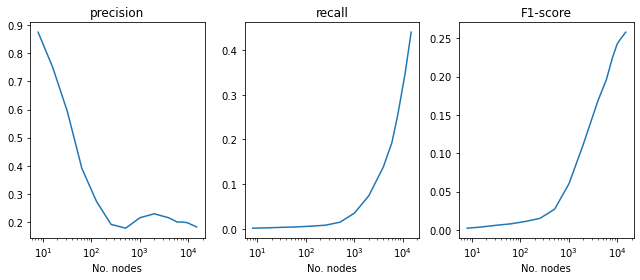

In [22]:
print("Plot the prediction performance of non-normalized feature sum.")

plt.figure(figsize=(9, 4))

plt.subplot(131)
plt.plot(sample_sizes, precs)
plt.xscale('log')
plt.title("precision")
plt.xlabel('No. nodes')

plt.subplot(132)
plt.plot(sample_sizes, recs)
plt.xscale('log')
plt.title("recall")
plt.xlabel('No. nodes')

plt.subplot(133)
plt.plot(sample_sizes, f1)
plt.xscale('log')
plt.title("F1-score")
plt.xlabel('No. nodes')

plt.tight_layout()

#### Feature sum with normalization
In this part, we normalize the features to avoid difference of scales of different features.

In [23]:
pred_fs_norm = feature_sum(X, normalize=True)

In [24]:
sample_sizes = [8, 16, 32, 64, 128, 256, 512, 1014, 2000, 4000, 6000, 8000, 10000, 11250, 15000]
precs, recs, f1 = precision_recall(pred_fs_norm, Y, *sample_sizes)

In [25]:
# Order of feature sum of all nodes
result_df = pd.DataFrame({'Y': Y, 'pred_fs': pred_fs})
result_df = result_df.sort_values(by=['pred_fs'], ascending=False)
print("Descending order of feature sum values")
result_df

Descending order of feature sum values


,Y,pred_fs
37347,1,1934.377740
37212,1,1931.017064
37839,1,1930.992847
37017,1,1930.218876
37416,1,1930.182462
...,...,...
25962,0,15.667713
25891,0,15.664104
40050,0,15.370605
25604,0,15.143244


In [27]:
print("Prediction performance of anamolous nodes based on the feature sum.\n")
print("Total number of samples: {}\n".format(len(Y)))
print("{}\t{}\t{}\t{}".format('samples', 'precision', 'recall', 'f1_score'))
print('-'*40)
for samples, prec, rec, f_1 in zip(sample_sizes, precs, recs, f1):
    print('{}\t{:.3f}\t\t{:.3f}\t{:.3f}'.format(samples, prec, rec, f_1))

Prediction performance of anamolous nodes based on the feature sum.

Total number of samples: 44000

samples	precision	recall	f1_score
----------------------------------------
8	0.875		0.001	0.002
16	0.750		0.002	0.004
32	0.594		0.003	0.006
64	0.391		0.004	0.008
128	0.273		0.006	0.011
256	0.191		0.008	0.015
512	0.178		0.015	0.027
1014	0.215		0.035	0.060
2000	0.229		0.074	0.112
4000	0.215		0.138	0.168
6000	0.200		0.193	0.196
8000	0.200		0.257	0.225
10000	0.196		0.316	0.242
11250	0.192		0.347	0.247
15000	0.182		0.440	0.258


In [29]:
avg_prec = average_precision(pred_fs, Y)
print("Average precision: ", avg_prec)

Average precision:  0.21156544931980242


Plot the prediction performance of non-normalized feature sum.


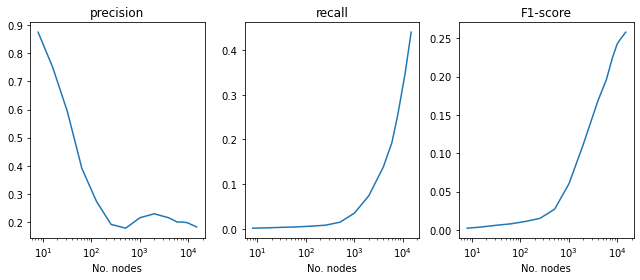

In [30]:
print("Plot the prediction performance of non-normalized feature sum.")

plt.figure(figsize=(9, 4))

plt.subplot(131)
plt.plot(sample_sizes, precs)
plt.xscale('log')
plt.title("precision")
plt.xlabel('No. nodes')

plt.subplot(132)
plt.plot(sample_sizes, recs)
plt.xscale('log')
plt.title("recall")
plt.xlabel('No. nodes')

plt.subplot(133)
plt.plot(sample_sizes, f1)
plt.xscale('log')
plt.title("F1-score")
plt.xlabel('No. nodes')

plt.tight_layout()